<a href="https://colab.research.google.com/github/SaadBrohi/Deep-Learning-Projects/blob/main/Deep_Image_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**READING DATA AND CLEARING DODGY IMAGES**

In [20]:
import zipfile
import os
import shutil

content_folder = "/content"
data_folder = os.path.join(content_folder, "data")

happy_folder = os.path.join(data_folder, "happy")
sad_folder = os.path.join(data_folder, "sad")

os.makedirs(happy_folder)
os.makedirs(sad_folder)

zip_info = {
    "happy.zip": happy_folder,
    "sad.zip": sad_folder
}

for zip_file, folder in zip_info.items():
    zip_path = os.path.join(content_folder, zip_file)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(folder)
        print(f"Extracted {zip_file} to {folder}")


Extracted happy.zip to /content/data/happy
Extracted sad.zip to /content/data/sad


In [21]:
import os

def delete_small_files(folder):
    for root, dirs, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            if os.path.getsize(file_path) < 10 * 1024:
                os.remove(file_path)
                print(f"Deleted small file: {file_path}")

content_folder = "/content"
data_folder = os.path.join(content_folder, "data")
happy_folder = os.path.join(data_folder, "happy")
sad_folder = os.path.join(data_folder, "sad")

delete_small_files(happy_folder)
delete_small_files(sad_folder)


Deleted small file: /content/data/happy/image9.jpeg
Deleted small file: /content/data/happy/image15.jpeg
Deleted small file: /content/data/happy/image20.jpeg
Deleted small file: /content/data/happy/vector3.svg
Deleted small file: /content/data/happy/image.jpeg
Deleted small file: /content/data/happy/image7.jpeg
Deleted small file: /content/data/happy/vector2.svg
Deleted small file: /content/data/happy/vector12.svg
Deleted small file: /content/data/happy/vector5.svg
Deleted small file: /content/data/happy/image3.jpeg
Deleted small file: /content/data/happy/image28.jpeg
Deleted small file: /content/data/happy/vector6.svg
Deleted small file: /content/data/happy/image16.jpeg
Deleted small file: /content/data/happy/vector9.svg
Deleted small file: /content/data/happy/vector8.svg
Deleted small file: /content/data/happy/vector13.svg
Deleted small file: /content/data/happy/image4.jpeg
Deleted small file: /content/data/happy/vector4.svg
Deleted small file: /content/data/happy/vector11.svg
Delete

In [22]:
data_dir = '/content/data'
os.listdir(data_dir)

['happy', 'sad', '.ipynb_checkpoints']

In [23]:
image_exts = ['jpeg','bmg','jpg','png']

In [24]:
image_exts

['jpeg', 'bmg', 'jpg', 'png']

In [25]:
import cv2
import imghdr
import matplotlib.pyplot as plt

for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
        print('Issue with image {}'.format(image_path))
        #os.remove(image_path)


Image not in ext list /content/data/happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
Image not in ext list /content/data/happy/getty_152414899_97046097045006_68075.jpg
Image not in ext list /content/data/happy/smiling-young-african-american-woman-260nw-2290057229.jpg
Image not in ext list /content/data/happy/group-happy-people-isolated-over-600w-102307264.jpg
Image not in ext list /content/data/happy/getty_478389113_970647970450091_99776.jpg
Image not in ext list /content/data/happy/smiling-woman_W6GFOSFAXA.jpg
Image not in ext list /content/data/happy/Happy20People.jpg
Image not in ext list /content/data/sad/aaxh2l5ni.webp
Image not in ext list /content/data/sad/silhouette-depressed-man-sadly-sitting-260nw-2242641921.jpg
Image not in ext list /content/data/sad/sad-people-are-standing-rooftop-092116870_prevstill.jpeg
Image not in ext list /content/data/sad/portrait-sad-man-600nw-126009806.jpg
Image not in ext list /content/data/sad/sad-person-pictures-1920-x-1270-5jatnx06kaizb3s

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [27]:
data = tf.keras.utils.image_dataset_from_directory('/content/data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 159 files belonging to 2 classes.


In [28]:
batch[0]

array([[[[1.02227242e+02, 1.01227242e+02, 9.72272415e+01],
         [1.06335938e+02, 1.05335938e+02, 1.03335938e+02],
         [1.10226562e+02, 1.09226562e+02, 1.06000000e+02],
         ...,
         [4.36132812e+01, 2.16132812e+01, 1.06132812e+01],
         [4.30000000e+01, 2.10000000e+01, 1.00000000e+01],
         [4.00000000e+01, 2.00000000e+01, 1.25455170e+01]],

        [[1.02722656e+02, 1.01722656e+02, 9.77226562e+01],
         [1.06335938e+02, 1.05335938e+02, 1.01766129e+02],
         [1.10591377e+02, 1.09591377e+02, 1.06364815e+02],
         ...,
         [4.36132812e+01, 2.16132812e+01, 1.06132812e+01],
         [4.30000000e+01, 2.10000000e+01, 1.00000000e+01],
         [4.28300781e+01, 2.00000000e+01, 1.19747772e+01]],

        [[1.03413551e+02, 1.02413551e+02, 9.84135513e+01],
         [1.06812080e+02, 1.05812080e+02, 1.02148018e+02],
         [1.10613281e+02, 1.09613281e+02, 1.06386719e+02],
         ...,
         [4.40000000e+01, 2.20000000e+01, 1.10000000e+01],
         [

In [29]:
batch[1]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int32)

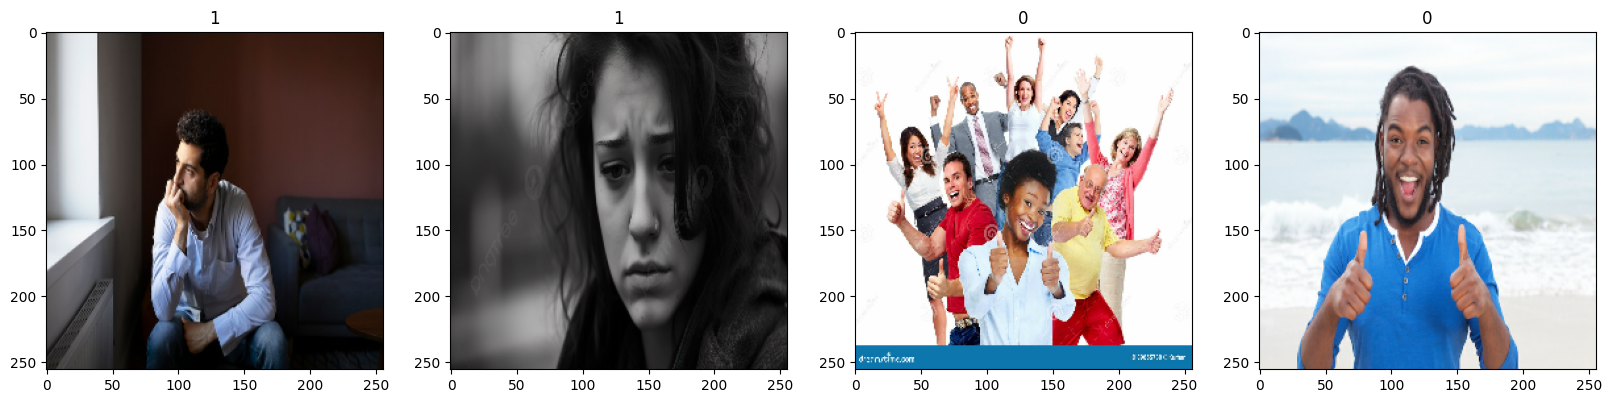

In [30]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

  #SAD PEOPLE = 1
  #HAPPY PEOPLE = 0

**DATA PREPROCESSING**

In [31]:
data = data.map(lambda x,y : (x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [32]:
batch[0].max()


1.0

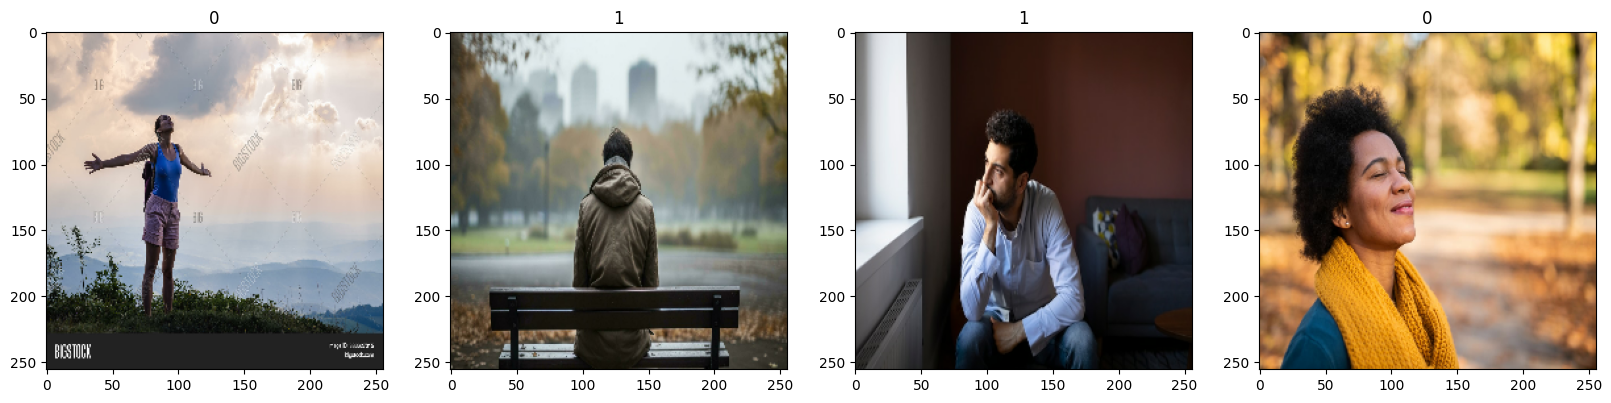

In [33]:
fig,ax = plt.subplots(ncols = 4 , figsize=(20,20))
for idx,img in  enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

Split Data


In [34]:
len(data)

5

In [35]:
train_size=int((len(data) *0.7)-0.5)
val_size = int((len(data) * 0.2))
test_size = int((len(data) * 0.1) + 0.5)


In [36]:
test_size + train_size + val_size

5

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [38]:
len(test)

1

**Build Deep Learning Model**

In [39]:
model = tf.keras.Sequential()

In [41]:
model.add(tf.keras.layers.Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(16, (3, 3), 1, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(16, (3, 3), 1, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 125, 125, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,692,001 (14.08 MB)

 Trainable params: 3,692,001 (14.08 MB)

 Non-trainable params: 0 (0.00 B)

**Train Model**

In [45]:
logdir='/content/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6693 - loss: 1.3706 - val_accuracy: 0.4062 - val_loss: 2.0789
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.4115 - loss: 1.5883 - val_accuracy: 0.6250 - val_loss: 0.7145
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6497 - loss: 0.6899 - val_accuracy: 0.6562 - val_loss: 0.5910
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6081 - loss: 0.7135 - val_accuracy: 0.5625 - val_loss: 0.6762
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7552 - loss: 0.6166 - val_accuracy: 0.7188 - val_loss: 0.5489
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7188 - loss: 0.5417 - val_accuracy: 0.7188 - val_loss: 0.5194
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7630 - loss: 0.4839 - val_accuracy: 0.6875 - val_loss: 0.5096
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7422 - loss: 0.4881 - val_accuracy: 0.8750 - val_loss: 0.4691
Epoch 9/20
3/3

**Plot Model Performance**

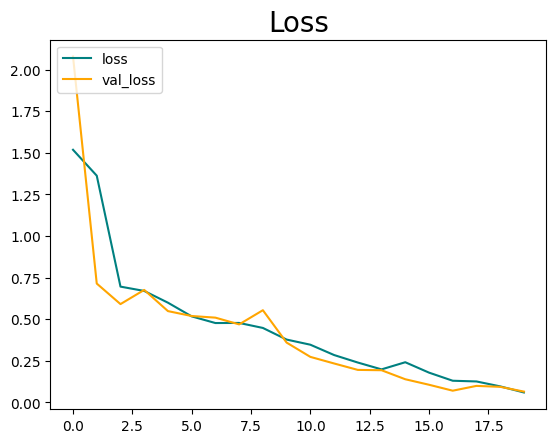

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(hist.history['loss'], color='teal', label='loss')
ax.plot(hist.history['val_loss'], color='orange', label='val_loss')
ax.set_title('Loss', fontsize=20)
ax.legend(loc="upper left")
plt.show()



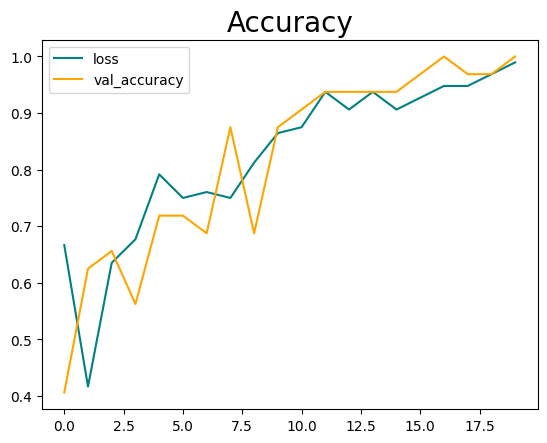

In [49]:
fig, ax = plt.subplots()
ax.plot(hist.history['accuracy'], color='teal', label='loss')
ax.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
ax.set_title('Accuracy', fontsize=20)
ax.legend(loc="upper left")
plt.show()

**Test Data and Evaluate Performance**

In [50]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [51]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [52]:
for Batch in test.as_numpy_iterator():
  X , Y = batch
  y_pred = model.predict(X)
  pre.update_state(Y,y_pred)
  re.update_state(Y,y_pred)
  acc.update_state(Y,y_pred)
  print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
Precision:0.949999988079071,Recall:1.0,Accuracy:0.96875


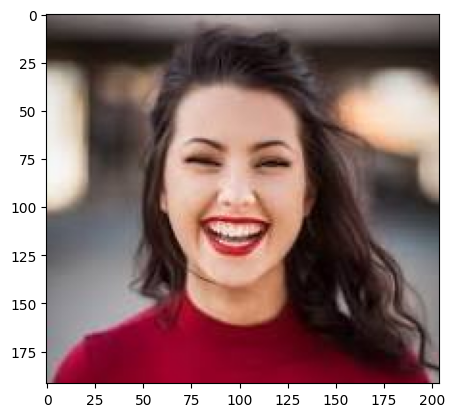

In [54]:
img = cv2.imread('/content/happytest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


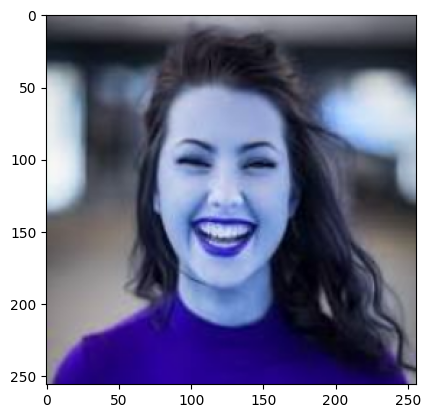

In [55]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
ypred = model.predict(np.expand_dims(resize/255,0))
if ypred > 0.5:
 print("Person is happy")
else :
 print("Person is sad")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Person is happy


In [57]:
y_pred

array([[0.2331385 ],
       [0.99418426],
       [0.98783505],
       [0.00317424],
       [0.9827434 ],
       [0.02053332],
       [0.991962  ],
       [0.99836904],
       [0.99589187],
       [0.92041576],
       [0.00198145],
       [0.988842  ],
       [0.9934815 ],
       [0.99592584],
       [0.00234622],
       [0.99632114],
       [0.06500153],
       [0.0057677 ],
       [0.57501644],
       [0.00230163],
       [0.10726313],
       [0.99868596],
       [0.9971367 ],
       [0.97465074],
       [0.01693215],
       [0.98333937],
       [0.9503632 ],
       [0.9505928 ],
       [0.00176994],
       [0.00654598],
       [0.5540894 ],
       [0.9912208 ]], dtype=float32)